# Support Vector Machine Classifier Implementation

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Creating a synthetic dataset

from sklearn.datasets import make_classification

In [14]:
x, y = make_classification(n_samples= 1000, n_features= 2, n_classes= 2,
                           n_clusters_per_class= 2, n_redundant= 0)

In [5]:
x

array([[ 1.44528715,  1.47320955],
       [ 0.42727552, -1.2938838 ],
       [-1.73608592,  1.40340047],
       ...,
       [ 1.73189747,  0.9782646 ],
       [-1.80895364, -0.50217051],
       [ 1.06488037, -0.32396571]])

In [6]:
x[0]

array([1.44528715, 1.47320955])

In [7]:
x[1]

array([ 0.42727552, -1.2938838 ])

## Visualizing these datapoints

In [8]:
pd.DataFrame(x)[0]

,0
0,1.445287
1,0.427276
2,-1.736086
3,0.614259
4,-1.201859
...,...
995,-0.458287
996,-0.344872
997,1.731897
998,-1.808954


<Axes: xlabel='0', ylabel='1'>

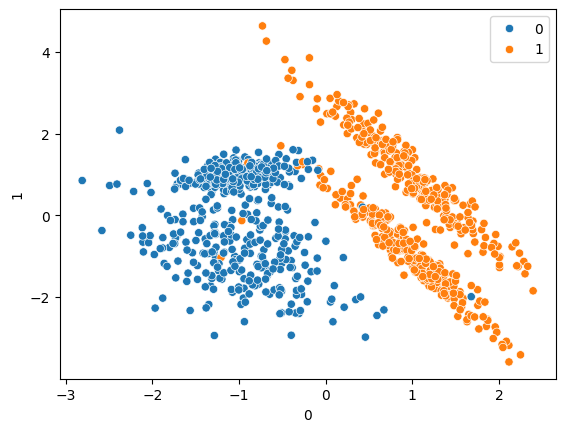

In [56]:
# Plotting the graph with both features x1 and x2 in x and y axis respectively.

sns.scatterplot(x = pd.DataFrame(x)[0], y = pd.DataFrame(x)[1], hue = y)

## Train - test split

In [28]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 10)

## Implemting the SVC model

In [29]:
from sklearn.svm import SVC

In [30]:
svc_model = SVC(kernel = 'linear')

In [31]:
svc_model.fit(x_train, y_train)

SVC(kernel='linear')

In [32]:
svc_model.coef_

array([[3.21847642, 1.0445225 ]])

NOTE: These are 'intercept' and 'slope' values respectively.

In [34]:
y_pred = svc_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

# Performance metrics

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [37]:
print("confusion matrix\n", confusion_matrix(y_pred, y_test))

print("accuracy score\n", accuracy_score(y_pred, y_test))

print("classification report\n", classification_report(y_pred, y_test))

confusion matrix
 [[115   2]
 [  4 129]]
accuracy score
 0.976
classification report
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       117
           1       0.98      0.97      0.98       133

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



# Hyperparameter tuning with SVC

In [39]:
from sklearn.model_selection import GridSearchCV

In [38]:
parameters = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001]
              }

In [41]:
cv = GridSearchCV(SVC(), param_grid = parameters, refit = True, cv = 5, verbose = 3)

In [42]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ....................C=0.1, gamma=1;, score=0.967 total time=   0.0s
[CV 2/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 3/5] END ....................C=0.1, gamma=1;, score=0.973 total time=   0.0s
[CV 4/5] END ....................C=0.1, gamma=1;, score=1.000 total time=   0.0s
[CV 5/5] END ....................C=0.1, gamma=1;, score=0.993 total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.1;, score=0.967 total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.1;, score=0.980 total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=0.1;, score=0.973 total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=0.1;, score=0.987 total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=0.1;, score=0.993 total time=   0.0s
[CV 1/5] END .................C=0.1, gamma=0.01;, score=0.940 total time=   0.0s
[CV 2/5] END .................C=0.1, gamma=0.01

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [43]:
cv.best_params_

{'C': 1, 'gamma': 0.1}

In [45]:
y_pred = cv.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1])

## Performance metrics

In [47]:
print("After Hyperparameter tuning\n")

print("confusion matrix\n", confusion_matrix(y_pred, y_test))

print("accuracy score\n", accuracy_score(y_pred, y_test))

print("classification report\n", classification_report(y_pred, y_test))

After Hyperparameter tuning

confusion matrix
 [[117   3]
 [  2 128]]
accuracy score
 0.98
classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.98      0.98      0.98       130

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250



# Lets's take linear kernel this time.

Note: By defualt, kernel = 'rbf'

In [48]:
parameters1 = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear'],
              }

In [50]:
cv1 = GridSearchCV(SVC(), param_grid = parameters1, refit = True, cv = 5, verbose = 3)

In [51]:
cv1.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.973 total time=   0.1s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.1s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.980 total time=   0.0s
[CV 3/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.973 total time=   0.0s
[CV 4/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.987 total time=   0.0s
[CV 1/5] END ..C=0.1, gamma=0.01, kernel=linear;, score=0.987 total time=   0.0s
[CV 2/5] END ..C=0.1, gamma=0.01, kernel=linear

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [52]:
cv1.best_params_

{'C': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [54]:
y_pred1 = cv1.predict(x_test)

In [55]:
print("After Hyperparameter tuning and taking linear kernel:\n")

print("confusion matrix\n", confusion_matrix(y_pred, y_test))

print("accuracy score\n", accuracy_score(y_pred, y_test))

print("classification report\n", classification_report(y_pred, y_test))

After Hyperparameter tuning and taking linear kernel:

confusion matrix
 [[117   3]
 [  2 128]]
accuracy score
 0.98
classification report
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       120
           1       0.98      0.98      0.98       130

    accuracy                           0.98       250
   macro avg       0.98      0.98      0.98       250
weighted avg       0.98      0.98      0.98       250

